## Rede neural artificial - Classificador

In [1]:
import pandas as pd
import numpy as np

## Base de dados :

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Treinamento e teste :

In [5]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [6]:
from sklearn.model_selection import train_test_split

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Normalização da features :

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()

In [10]:
scaler.fit(X_train)

MinMaxScaler()

In [11]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Desenvolvimento da RNA :

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [13]:
X_train.shape

(426, 30)

In [14]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

## Treinamento do modelo :

In [15]:
model.fit(x = X_train, 
          y = y_train, 
          epochs = 600,
          validation_data = (X_test, y_test), verbose = 1)

Epoch 1/600
14/14 [==============================] - 1s 18ms/step - loss: 0.6689 - val_loss: 0.6428
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6330 - val_loss: 0.6100
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5969 - val_loss: 0.5740
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5604 - val_loss: 0.5373
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5218 - val_loss: 0.4946
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4810 - val_loss: 0.4507
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4343 - val_loss: 0.4097
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3933 - val_loss: 0.3636
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3519 - val_loss: 0.3239
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3155 - val_loss: 0.2893
Epoch 11

14/14 [==============================] - 0s 8ms/step - loss: 0.0588 - val_loss: 0.1103
Epoch 84/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0549 - val_loss: 0.1247
Epoch 85/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0530 - val_loss: 0.1187
Epoch 86/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0528 - val_loss: 0.1129
Epoch 87/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0532 - val_loss: 0.1231
Epoch 88/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0541 - val_loss: 0.1206
Epoch 89/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0531 - val_loss: 0.1201
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0520 - val_loss: 0.1170
Epoch 91/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0524 - val_loss: 0.1135
Epoch 92/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0521 - val_loss: 0.1158
Epoch 93/600


14/14 [==============================] - 0s 7ms/step - loss: 0.0405 - val_loss: 0.1271
Epoch 165/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0386 - val_loss: 0.1233
Epoch 166/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0410 - val_loss: 0.1474
Epoch 167/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0453 - val_loss: 0.1223
Epoch 168/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0411 - val_loss: 0.1244
Epoch 169/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0383 - val_loss: 0.1283
Epoch 170/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0461 - val_loss: 0.1416
Epoch 171/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0430 - val_loss: 0.1198
Epoch 172/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0405 - val_loss: 0.1326
Epoch 173/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0388 - val_loss: 0.1322
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0300 - val_loss: 0.1297
Epoch 246/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0310 - val_loss: 0.1353
Epoch 247/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0290 - val_loss: 0.1389
Epoch 248/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0296 - val_loss: 0.1244
Epoch 249/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0299 - val_loss: 0.1438
Epoch 250/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0287 - val_loss: 0.1264
Epoch 251/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0290 - val_loss: 0.1286
Epoch 252/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0289 - val_loss: 0.1357
Epoch 253/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0289 - val_loss: 0.1333
Epoch 254/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0300 - val_loss: 0.1319
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0238 - val_loss: 0.1309
Epoch 327/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0226 - val_loss: 0.1346
Epoch 328/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0230 - val_loss: 0.1301
Epoch 329/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0215 - val_loss: 0.1409
Epoch 330/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0216 - val_loss: 0.1323
Epoch 331/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0278 - val_loss: 0.1394
Epoch 332/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0273 - val_loss: 0.1263
Epoch 333/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0229 - val_loss: 0.1359
Epoch 334/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0229 - val_loss: 0.1351
Epoch 335/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0238 - val_loss: 0.1406
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0166 - val_loss: 0.1558
Epoch 408/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0178 - val_loss: 0.1473
Epoch 409/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0162 - val_loss: 0.1566
Epoch 410/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0170 - val_loss: 0.1604
Epoch 411/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0169 - val_loss: 0.1573
Epoch 412/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0166 - val_loss: 0.1529
Epoch 413/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0166 - val_loss: 0.1547
Epoch 414/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0164 - val_loss: 0.1629
Epoch 415/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0156 - val_loss: 0.1611
Epoch 416/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0160 - val_loss: 0.1608
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0131 - val_loss: 0.2104
Epoch 489/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0113 - val_loss: 0.2036
Epoch 490/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0112 - val_loss: 0.2110
Epoch 491/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0165 - val_loss: 0.2134
Epoch 492/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0153 - val_loss: 0.2333
Epoch 493/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0120 - val_loss: 0.2165
Epoch 494/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0154 - val_loss: 0.2121
Epoch 495/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0113 - val_loss: 0.2147
Epoch 496/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0107 - val_loss: 0.2206
Epoch 497/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0108 - val_loss: 0.2112
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0091 - val_loss: 0.2625
Epoch 570/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0125 - val_loss: 0.2863
Epoch 571/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0094 - val_loss: 0.2675
Epoch 572/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0082 - val_loss: 0.2830
Epoch 573/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0077 - val_loss: 0.2705
Epoch 574/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0071 - val_loss: 0.2905
Epoch 575/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0073 - val_loss: 0.2694
Epoch 576/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0076 - val_loss: 0.2804
Epoch 577/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0073 - val_loss: 0.2712
Epoch 578/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0074 - val_loss: 0.2847
Epoc

<AxesSubplot:>

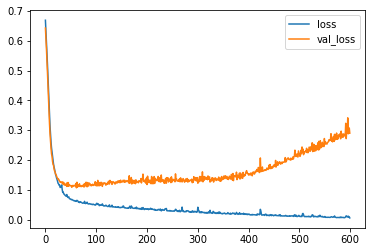

In [16]:
model_loss = pd.DataFrame(model.history.history)

model_loss.plot()

## Evitando o Overfitting :

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [18]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [19]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [20]:
model.fit(x = X_train, 
          y = y_train, 
          epochs = 600,
          validation_data = (X_test, y_test), verbose = 1,
          callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.7030 - val_loss: 0.6754
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6669 - val_loss: 0.6493
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6358 - val_loss: 0.6158
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5995 - val_loss: 0.5787
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5611 - val_loss: 0.5317
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5083 - val_loss: 0.4607
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4426 - val_loss: 0.4015
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3896 - val_loss: 0.3520
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3449 - val_loss: 0.3100
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3089 - val_loss: 0.2776
Epoch 11

14/14 [==============================] - 0s 5ms/step - loss: 0.0465 - val_loss: 0.1035
Epoch 83: early stopping


<AxesSubplot:>

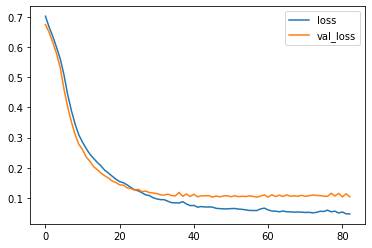

In [21]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Validação do modelo :

In [22]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 2ms/step


In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        55
           1       0.98      0.98      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [25]:
print(confusion_matrix(y_test,predictions))

[[53  2]
 [ 2 86]]
